In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

sns.set(style="white", context="talk")

In [2]:
# Base de datos SKU => Model
def get_categoria(x):
    pack = x.split('.')
    return pack[0]

viewed_product = data[data['event'] == 'viewed product']
viewed_product['sku_real'] = viewed_product.sku.apply(lambda x: get_categoria(x))

productos = viewed_product[['sku_real', 'sku', 'model']]
diccionario = productos[['sku_real', 'model']].set_index('sku_real').to_dict()
# diccionario['model'][12661]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0,0.5,'Modelo')

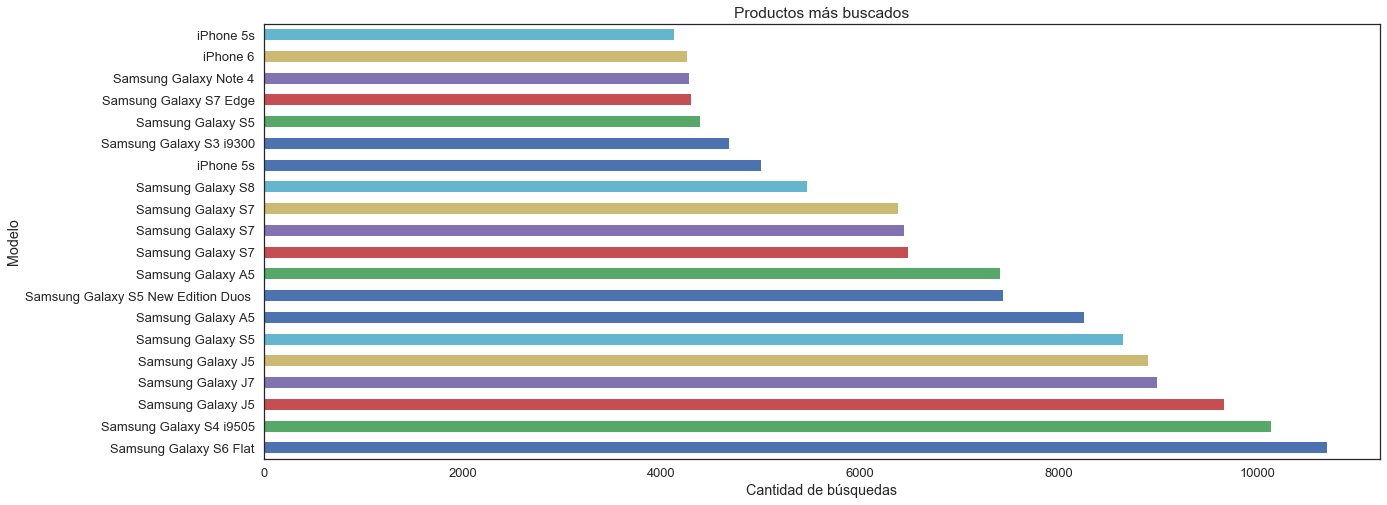

In [13]:
def buscar(x, d):
    if str(x) in d['model']:
        return d['model'][str(x)]
    return 'no'

busquedas = data[data['event'] == 'searched products']
busquedas = busquedas['skus'].str.split(',', expand = True) # Rompo la lista de Skus y genero una lista para cada sku
busquedas = busquedas.stack().to_frame('sku')

skus_mas_visitados = busquedas.reset_index()['sku'].value_counts().to_frame('Visitas').reset_index()
skus_mas_visitados.columns = ['sku', 'visitas']
skus_mas_visitados['model'] = skus_mas_visitados.sku.apply(lambda x: buscar(x, diccionario))
datos = skus_mas_visitados.set_index('model')
graf = datos.head(20).visitas.plot.barh(figsize = (20, 8))
# datos.plot.bar(x = 'visitas', y = 'model')
graf.set_title('Productos más buscados')
graf.set_xlabel('Cantidad de búsquedas')
graf.set_ylabel('Modelo')

In [9]:
skus_mas_visitados

,sku,visitas,model
0,3371,10698,Samsung Galaxy S6 Flat
1,2777,10142,Samsung Galaxy S4 i9505
2,6357,9663,Samsung Galaxy J5
3,6413,8986,Samsung Galaxy J7
4,6371,8898,Samsung Galaxy J5
5,2718,8652,Samsung Galaxy S5
6,3179,8252,Samsung Galaxy A5
7,6791,7444,Samsung Galaxy S5 New Edition Duos
8,3191,7408,Samsung Galaxy A5
9,8443,6484,Samsung Galaxy S7
